In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\norat\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [350]:
with open("./SW ep1.txt", "r") as file:
    text = file.read()

text


'STAR WARS : EPISODE 1:THE PHANTOM MENACE\n\n\n\nTITLE CARD : A long time ago in a galaxy far, far away....\n\nA vast sea of stars serves as the backdrop for the main title, followed by\na roll up, which crawls up into infinity.\n\nEPISODE 1 THE PHANTOM MENACE\n\nTurmoil has engulfed the Galactic Republic. The taxation of trade routes to\noutlaying star systems is in dispute.\nHoping to resolve the matter with a blockade of deadly battleships, the\ngreedy Trade Federation has stopped all shipping to the small planet of\nNaboo.\nWhile the congress of the Republic endlessly debates this alarming chain of\nevents, the Supreme Chancellor has secretly dispatched two Jedi Knights,\nthe guardians of peace and justice in the galaxy, to settle the\nconflict.....\n\nPAN DOWN to reveal a small space cruiser heading TOWARD CAMERA at great\nspeed. PAN with the cruiser as it heads towardthe beautiful green planet of\nNaboo, which is surrounded by hundreds of Trade Federation battleships.\n\nINT. REP

In [351]:
from typing import List
import re


word_list = text.split(" ")
cleaned_list = []

for word in word_list:
    cleaned_word = re.sub(r"[^a-zA-Z0-9-_]", " ", word)
    cleaned_list.append(cleaned_word)

cleaned_list = [word.split(" ") for word in cleaned_list]

cleaned_list = [word for sublist in cleaned_list for word in sublist]

cleaned_list = [word.lower() for word in cleaned_list if word != ""]

cleaned_list[140:170]

['with',
 'the',
 'cruiser',
 'as',
 'it',
 'heads',
 'towardthe',
 'beautiful',
 'green',
 'planet',
 'of',
 'naboo',
 'which',
 'is',
 'surrounded',
 'by',
 'hundreds',
 'of',
 'trade',
 'federation',
 'battleships',
 'int',
 'republic',
 'cruiser',
 '-',
 'cockpit',
 'in',
 'the',
 'cockpit',
 'of']

In [352]:
pattern = r"\bint\b"
scene_numbers = []

for i, word in enumerate(cleaned_list):
    if re.search(pattern, word):
        scene_numbers.append(i)

In [535]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

r = requests.get("https://www.imdb.com/title/tt0120915/fullcredits?ref_=tt_ov_st_sm")
soup = bs(r.text, "html.parser")

# character_table = soup.find("div", class_="jhtnKe oJxN6") #.find_all("span", class_="mw-headline")


table = soup.find("table", class_="cast_list")
# character_table = character_table.find_all("div", class_="JjtOHd").text
character_list = table.find_all("td", class_="character")


character_names = []
for character in character_list:
    name = character.find("a").text
    if len(name.split(" ")) <= 3 and name not in character_names:
        character_names.append(name.lower())

In [561]:
characters_dict = {}

for name in character_names:
    if (
        name == "senator palpatine"
        or name == "darth maul"
        or name.startswith("captain")
        or name == "queen amidala"
    ):
        first_name = name.split(" ", 1)[1]
        characters_dict[first_name] = name
    else:
        first_name = name.split(" ", 1)[0]
        characters_dict[first_name] = name

In [569]:
plus_names = ["jinn", "kenobi", "padmé", "darth sidous"]

characters_dict["jinn"] = "qui-gon jinn"
characters_dict["kenobi"] = "obi-wan kenobi"
characters_dict["padmé"] = "queen amidala"
characters_dict["darth sidious"] = "darth sidous"
characters_dict["windu"] = "mace windu"
characters_dict["skywalker"] = "anakin skywalker"
characters_dict["valorum"] = "chancellor valorum"

In [563]:
del characters_dict["coruscant"]
del characters_dict["battle"]
del characters_dict["republic"]
del characters_dict["senate"]
del characters_dict["mawhonic"]
del characters_dict["palace"]
del characters_dict["naboo"]


In [596]:
len(scene_numbers)


92

In [610]:
scenes = []
for i in range(len(scene_numbers) - 1):
    characters_in_scenes = []
    end_i = min(i + 1, scene_numbers[-1])
    for scene_word in cleaned_list[scene_numbers[i] : scene_numbers[end_i]]:
        if scene_word in characters_dict.keys():
            characters_in_scenes.append(characters_dict.get(scene_word))
    scenes.append(characters_in_scenes)

In [611]:
scenes


[['qui-gon jinn',
  'qui-gon jinn',
  'nute gunray',
  'chancellor valorum',
  'nute gunray'],
 ['tc-14', 'tc-14', 'tc-14', 'tc-14'],
 ['tc-14',
  'tc-14',
  'obi-wan kenobi',
  'obi-wan kenobi',
  'qui-gon jinn',
  'qui-gon jinn',
  'obi-wan kenobi',
  'obi-wan kenobi',
  'qui-gon jinn',
  'obi-wan kenobi',
  'qui-gon jinn',
  'obi-wan kenobi',
  'obi-wan kenobi',
  'yoda',
  'qui-gon jinn',
  'obi-wan kenobi',
  'chancellor valorum',
  'qui-gon jinn'],
 ['nute gunray', 'tc-14', 'nute gunray', 'tc-14'],
 ['nute gunray', 'nute gunray', 'tc-14'],
 ['nute gunray',
  'rune haako',
  'rune haako',
  'nute gunray',
  'nute gunray',
  'rune haako',
  'nute gunray',
  'rune haako',
  'nute gunray',
  'rune haako'],
 ['qui-gon jinn', 'obi-wan kenobi', 'qui-gon jinn'],
 ['qui-gon jinn',
  'obi-wan kenobi',
  'nute gunray',
  'qui-gon jinn',
  'rune haako',
  'nute gunray',
  'rune haako'],
 ['qui-gon jinn',
  'qui-gon jinn',
  'obi-wan kenobi',
  'obi-wan kenobi',
  'qui-gon jinn',
  'obi-wan k

In [612]:
relationships = []
for scene in scenes:
    if len(scene) > 1:
        for i, name in enumerate(scene[:-1]):
            pair = scene[i + 1]
            if name != pair:
                relationships.append({"source": name, "target": pair})

In [613]:
network_df = pd.DataFrame(relationships)

In [614]:
import numpy as np

network_df = pd.DataFrame(
    np.sort(network_df.values, axis=1), columns=network_df.columns
)
network_df["weight"] = 1
network_df = network_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [615]:
network_df = network_df.sort_values(by="weight", ascending=False)


In [616]:
network_df.reset_index(inplace=True, drop=True)


In [617]:
network_df


,source,target,weight
0,obi-wan kenobi,qui-gon jinn,156
1,anakin skywalker,qui-gon jinn,153
2,jar jar binks,qui-gon jinn,115
3,anakin skywalker,shmi skywalker,66
4,anakin skywalker,jar jar binks,58
...,...,...,...
157,jira,watto,1
158,senator palpatine,sio bibble,1
159,gungan guard,senator palpatine,1
160,chancellor valorum,jar jar binks,1


In [618]:
import networkx as nx
import matplotlib.pyplot as plt

In [619]:
G = nx.Graph()

for i, row in network_df.iterrows():
    G.add_edge(row.source, row.target, weight=row.weight)


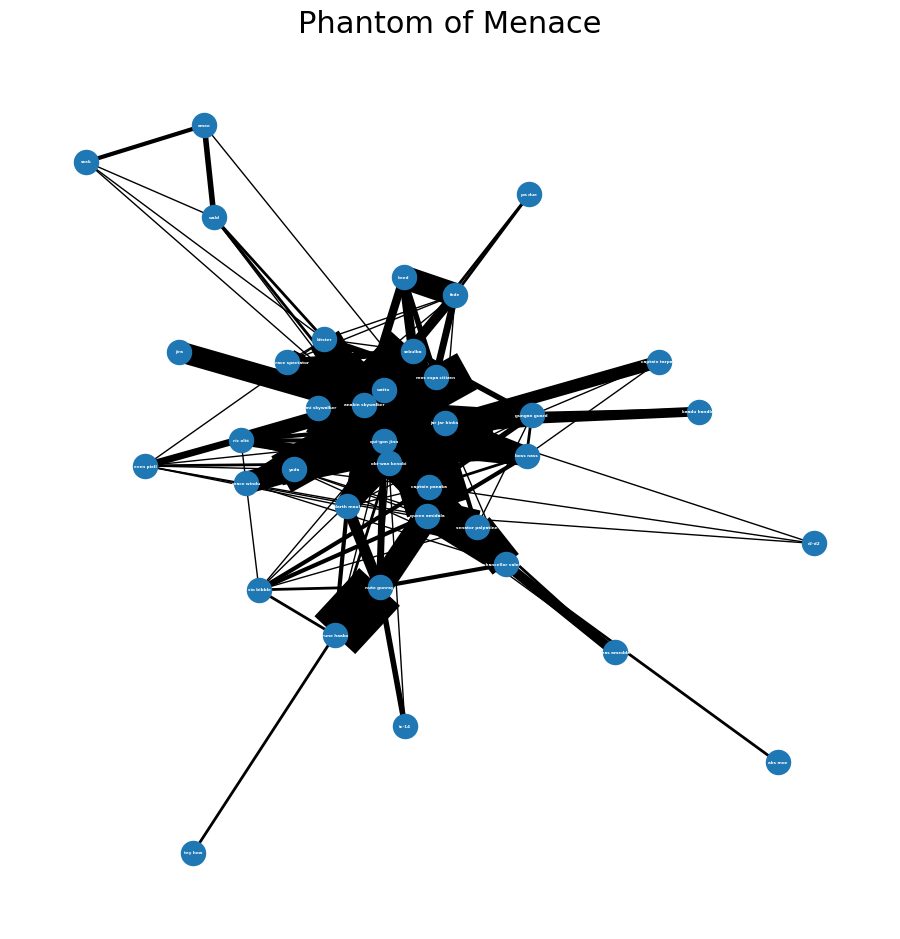

In [620]:
show_network(G, "Phantom of Menace")


In [621]:
G = nx.from_pandas_edgelist(
    df=network_df, source="source", target="target", edge_attr="weight"
)
nx.write_gexf(G, "/Users/norat/Desktop/sw1.1.gexf")

In [974]:
text = ""
for i in range(1, 4):
    with open(f"./SW ep{i}.txt", "r") as file:
        text_part = file.read()
        text += text_part

In [975]:
text


'STAR WARS : EPISODE 1:THE PHANTOM MENACE\n\n\n\nTITLE CARD : A long time ago in a galaxy far, far away....\n\nA vast sea of stars serves as the backdrop for the main title, followed by\na roll up, which crawls up into infinity.\n\nEPISODE 1 THE PHANTOM MENACE\n\nTurmoil has engulfed the Galactic Republic. The taxation of trade routes to\noutlaying star systems is in dispute.\nHoping to resolve the matter with a blockade of deadly battleships, the\ngreedy Trade Federation has stopped all shipping to the small planet of\nNaboo.\nWhile the congress of the Republic endlessly debates this alarming chain of\nevents, the Supreme Chancellor has secretly dispatched two Jedi Knights,\nthe guardians of peace and justice in the galaxy, to settle the\nconflict.....\n\nPAN DOWN to reveal a small space cruiser heading TOWARD CAMERA at great\nspeed. PAN with the cruiser as it heads towardthe beautiful green planet of\nNaboo, which is surrounded by hundreds of Trade Federation battleships.\n\nINT. REP

In [976]:
word_list = text.split(" ")
cleaned_list = []

for word in word_list:
    cleaned_word = re.sub(r"[^a-zA-Z0-9-_]", " ", word)
    cleaned_list.append(cleaned_word)

cleaned_list = [word.split(" ") for word in cleaned_list]

cleaned_list = [word for sublist in cleaned_list for word in sublist]

cleaned_list = [word.lower() for word in cleaned_list if word != ""]

In [977]:
urls = [
    "https://www.imdb.com/title/tt0120915/fullcredits?ref_=tt_ov_st_sm",
    "https://www.imdb.com/title/tt0121765/fullcredits?ref_=tt_ov_st_sm",
    "https://www.imdb.com/title/tt0121766/fullcredits?ref_=tt_ov_st_sm",
]

character_names_dict = {}

for url in urls:
    r = requests.get(url)
    soup = bs(r.text, "html.parser")

    # character_table = soup.find("div", class_="jhtnKe oJxN6") #.find_all("span", class_="mw-headline")

    table = soup.find("table", class_="cast_list")
    # character_table = character_table.find_all("div", class_="JjtOHd").text
    character_list = table.find_all("td", class_="character")

    for character in character_list:
        try:
            name = character.find("a").text
            splitted_name = name.split(" ")
            if len(splitted_name) <= 3:
                for i in range(len(splitted_name)):
                    if not splitted_name[i].lower() in character_names_dict.keys():
                        character_names_dict[splitted_name[i].lower()] = name
        except AttributeError as e:
            continue

In [978]:
character_names_dict["sidious"] = "The Emperor"
character_names_dict["palpatine"] = "The Emperor"
character_names_dict["annie"] = "Anakin Skywalker"
character_names_dict["padme"] = "Queen Amidala"
character_names_dict["threepio"] = "C-3PO"
character_names_dict["artoo"] = "R2-D2"


In [979]:
del character_names_dict["of"]
del character_names_dict["the"]
del character_names_dict["republic"]
del character_names_dict["cruiser"]
del character_names_dict["droid"]
del character_names_dict["captain"]
del character_names_dict["jedi"]
del character_names_dict["we"]
del character_names_dict["how"]
del character_names_dict["blue"]
del character_names_dict["senate"]
del character_names_dict["naboo"]


In [980]:
pattern = r"\bint\b"
scene_numbers = []

for i, word in enumerate(cleaned_list):
    if re.search(pattern, word):
        scene_numbers.append(i)

In [981]:
scenes = []
for i in range(len(scene_numbers) - 1):
    characters_in_scenes = []
    end_i = min(i + 1, scene_numbers[-1])
    for scene_word in cleaned_list[scene_numbers[i] : scene_numbers[end_i]]:
        for name in character_names_dict.keys():
            if scene_word == name:
                characters_in_scenes.append(character_names_dict.get(scene_word))
    scenes.append(characters_in_scenes)

In [982]:
scenes


[['Naboo Fighter Pilot',
  'Qui-Gon Jinn',
  'Qui-Gon Jinn',
  'Nute Gunray',
  'Nute Gunray',
  'Pa Due',
  'Supreme Chancellor Palpatine',
  'Chancellor Valorum',
  'Nute Gunray'],
 ['TC-14', 'Runway Worker', 'TC-14', 'TC-14', 'TC-14'],
 ['TC-14',
  'TC-14',
  'Obi-Wan Kenobi',
  'Obi-Wan Kenobi',
  'Qui-Gon Jinn',
  'Qui-Gon Jinn',
  'Obi-Wan Kenobi',
  'Aurra Sing',
  'Obi-Wan Kenobi',
  'Qui-Gon Jinn',
  'Obi-Wan Kenobi',
  'Qui-Gon Jinn',
  'Obi-Wan Kenobi',
  'Obi-Wan Kenobi',
  'Yoda',
  'Qui-Gon Jinn',
  'Obi-Wan Kenobi',
  'Chancellor Valorum',
  'Qui-Gon Jinn'],
 ['Nute Gunray',
  'Nute Gunray',
  'Daultay Dofine',
  'TC-14',
  'Nute Gunray',
  'TC-14',
  'Daultay Dofine'],
 ['Nute Gunray',
  'Battle Droid',
  'Nute Gunray',
  'Battle Droid',
  'Battle Droid',
  'TC-14',
  'Dixon Just',
  'Battle Droid',
  'Fire Speeder Pilot'],
 ['Nute Gunray',
  'Rune Haako',
  'Rune Haako',
  'Nute Gunray',
  'Nute Gunray',
  'Rune Haako',
  'Jedi Knight',
  'Nute Gunray',
  'Rune Haako',

In [983]:
relationships = []
for scene in scenes:
    if len(scene) > 1:
        for i, name in enumerate(scene[:-1]):
            pair = scene[i + 1]
            if name != pair:
                relationships.append({"source": name, "target": pair})

In [984]:
relationships


[{'source': 'Naboo Fighter Pilot', 'target': 'Qui-Gon Jinn'},
 {'source': 'Qui-Gon Jinn', 'target': 'Nute Gunray'},
 {'source': 'Nute Gunray', 'target': 'Pa Due'},
 {'source': 'Pa Due', 'target': 'Supreme Chancellor Palpatine'},
 {'source': 'Supreme Chancellor Palpatine', 'target': 'Chancellor Valorum'},
 {'source': 'Chancellor Valorum', 'target': 'Nute Gunray'},
 {'source': 'TC-14', 'target': 'Runway Worker'},
 {'source': 'Runway Worker', 'target': 'TC-14'},
 {'source': 'TC-14', 'target': 'Obi-Wan Kenobi'},
 {'source': 'Obi-Wan Kenobi', 'target': 'Qui-Gon Jinn'},
 {'source': 'Qui-Gon Jinn', 'target': 'Obi-Wan Kenobi'},
 {'source': 'Obi-Wan Kenobi', 'target': 'Aurra Sing'},
 {'source': 'Aurra Sing', 'target': 'Obi-Wan Kenobi'},
 {'source': 'Obi-Wan Kenobi', 'target': 'Qui-Gon Jinn'},
 {'source': 'Qui-Gon Jinn', 'target': 'Obi-Wan Kenobi'},
 {'source': 'Obi-Wan Kenobi', 'target': 'Qui-Gon Jinn'},
 {'source': 'Qui-Gon Jinn', 'target': 'Obi-Wan Kenobi'},
 {'source': 'Obi-Wan Kenobi', 'tar

In [985]:
network_df = pd.DataFrame(relationships)
network_df = pd.DataFrame(
    np.sort(network_df.values, axis=1), columns=network_df.columns
)
network_df["weight"] = 1
network_df = network_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [986]:
network_df = network_df.sort_values(by="weight", ascending=False)
network_df.reset_index(inplace=True, drop=True)


In [988]:
network_df


,source,target,weight
0,Anakin Skywalker,Queen Amidala,654
1,Anakin Skywalker,Obi-Wan Kenobi,527
2,Anakin Skywalker,The Emperor,187
3,Obi-Wan Kenobi,Qui-Gon Jinn,146
4,Anakin Skywalker,Qui-Gon Jinn,144
...,...,...,...
1166,Clone War Jedi,Ric Olié,1
1167,Jar Jar Binks,Jedi Knight,1
1168,Jar Jar Binks,Naboo Starship Pilot,1
1169,Count Dooku,Starfreighter Security Officer,1


In [989]:
G = nx.Graph()

for i, row in network_df.iterrows():
    G.add_edge(row.source, row.target, weight=row.weight)


In [990]:
G = nx.from_pandas_edgelist(
    df=network_df, source="source", target="target", edge_attr="weight"
)
nx.write_gexf(G, "/Users/norat/Desktop/sw1_3.gexf")

# Star Wars 4-6

In [991]:
text = ""
for i in range(4, 7):
    with open(f"./SW ep{i}.txt", "r") as file:
        text_part = file.read()
        text += text_part

word_list = text.split(" ")
cleaned_list = []

for word in word_list:
    cleaned_word = re.sub(r"[^a-zA-Z0-9-_]", " ", word)
    cleaned_list.append(cleaned_word)

cleaned_list = [word.split(" ") for word in cleaned_list]

cleaned_list = [word for sublist in cleaned_list for word in sublist]

cleaned_list = [word.lower() for word in cleaned_list if word != ""]

urls = [
    "https://www.imdb.com/title/tt0076759/fullcredits?ref_=tt_ov_st_sm",
    "https://www.imdb.com/title/tt0080684/fullcredits?ref_=tt_ov_st_sm",
    "https://www.imdb.com/title/tt0086190/fullcredits?ref_=tt_ov_st_sm",
]

character_names_dict = {}

for url in urls:
    r = requests.get(url)
    soup = bs(r.text, "html.parser")

    # character_table = soup.find("div", class_="jhtnKe oJxN6") #.find_all("span", class_="mw-headline")

    table = soup.find("table", class_="cast_list")
    # character_table = character_table.find_all("div", class_="JjtOHd").text
    character_list = table.find_all("td", class_="character")

    for character in character_list[:30]:
        try:
            name = character.find("a").text
            splitted_name = name.split(" ")
            if len(splitted_name) <= 3:
                for i in range(len(splitted_name)):
                    if not splitted_name[i].lower() in character_names_dict.keys():
                        character_names_dict[splitted_name[i].lower()] = name
        except AttributeError as e:
            continue

In [992]:
character_names_dict["ben"] = "Obi-Wan Kenobi"
character_names_dict["obi-wan"] = "Obi-Wan Kenobi"
character_names_dict["kenobi"] = "Obi-Wan Kenobi"
character_names_dict["threepio"] = "C-3PO"
character_names_dict["artoo"] = "R2-D2"
character_names_dict["emperor"] = "The Emperor"
character_names_dict["chewie"] = "Chewbacca"

In [993]:
character_names_dict["leia"]


'Princess Leia Organa'

In [994]:
character_names_dict.get("")


In [995]:
scenes = []
for i in range(len(scene_numbers) - 1):
    characters_in_scenes = []
    end_i = min(i + 1, scene_numbers[-1])
    for scene_word in cleaned_list[scene_numbers[i] : scene_numbers[end_i]]:
        for name in character_names_dict.keys():
            if scene_word == name:
                characters_in_scenes.append(character_names_dict.get(scene_word))
    scenes.append(characters_in_scenes)


relationships = []
for scene in scenes:
    if len(scene) > 1:
        for i, name in enumerate(scene[:-1]):
            pair = scene[i + 1]
            if name != pair:
                relationships.append({"source": name, "target": pair})


network_df_4_6 = pd.DataFrame(relationships)
network_df_4_6 = pd.DataFrame(
    np.sort(network_df_4_6.values, axis=1), columns=network_df_4_6.columns
)
network_df_4_6["weight"] = 1
network_df_4_6 = network_df_4_6.groupby(
    ["source", "target"], sort=False, as_index=False
).sum()
network_df_4_6 = network_df_4_6.sort_values(by="weight", ascending=False)
network_df_4_6.reset_index(inplace=True, drop=True)

In [996]:
network_df_4_6


,source,target,weight
0,Luke Skywalker,The Emperor,804
1,Han Solo,The Emperor,465
2,Princess Leia Organa,The Emperor,345
3,Darth Vader,The Emperor,335
4,C-3PO,The Emperor,275
...,...,...,...
314,Red Two (Wedge),Snow Creature,1
315,Captain Needa,Princess Leia Organa,1
316,C-3PO,Gold Leader,1
317,General Veers,Imperial Officer,1


In [946]:
G = nx.Graph()

In [997]:
G = nx.from_pandas_edgelist(
    df=network_df_4_6, source="source", target="target", edge_attr="weight"
)
nx.write_gexf(G, "/Users/norat/Desktop/sw4_6.gexf")

In [998]:
sw_1_6 = pd.concat([network_df, network_df_4_6], ignore_index=True)


In [999]:
sw_1_6 = sw_1_6.sort_values(by="weight", ascending=False)


In [1000]:
sw_1_6.reset_index(inplace=True, drop=True)


In [1003]:
G = nx.from_pandas_edgelist(
    df=sw_1_6, source="source", target="target", edge_attr="weight"
)
nx.write_gexf(G, "/Users/norat/Desktop/sw_1_6.gexf")

In [1005]:
sw_1_6


,source,target,weight
0,Luke Skywalker,The Emperor,804
1,Anakin Skywalker,Queen Amidala,654
2,Anakin Skywalker,Obi-Wan Kenobi,527
3,Han Solo,The Emperor,465
4,Princess Leia Organa,The Emperor,345
...,...,...,...
1485,Jango Fett,Senator Po Nudo,1
1486,Mon Mothma,Naboo Fighter Pilot,1
1487,Fire Speeder Pilot,Gungan Guard,1
1488,Battle Droid,Starfreighter Security Officer,1


In [1004]:
G.number_of_edges()


1474

In [961]:
nodes_df = pd.read_csv("/Users/norat/Desktop/nodes.csv")


In [962]:
nodes_df


,Id,Label,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class
0,Luke Skywalker,Luke Skywalker,1905,3,0.498708,0.556131,363.230756,2
1,The Emperor,The Emperor,3943,3,0.523035,0.599309,1339.156994,1
2,Anakin Skywalker,Anakin Skywalker,2207,3,0.663230,0.749568,3776.160346,0
3,Queen Amidala,Queen Amidala,1740,3,0.630719,0.719344,2160.930864,0
4,Obi-Wan Kenobi,Obi-Wan Kenobi,1672,2,0.652027,0.733161,3428.232448,2
...,...,...,...,...,...,...,...,...
186,Oppo Rancisis,Oppo Rancisis,2,4,0.352190,0.367444,2.975733,4
187,Denaria Kee,Denaria Kee,4,4,0.402083,0.426598,0.250000,0
188,Yarael Poof,Yarael Poof,2,4,0.410638,0.431779,0.000000,0
189,Holographic Shaak Ti,Holographic Shaak Ti,2,4,0.340989,0.360535,0.000000,2


In [963]:
labels = nodes_df.Label.to_list()


In [964]:
degrees = nodes_df["Weighted Degree"].to_list()


In [965]:
new_labels = []
for idx, degree in enumerate(degrees):
    if degree > 10:
        new_labels.append(labels[idx])
    else:
        new_labels.append("")


In [967]:
nodes_df2 = nodes_df.copy()


In [968]:
nodes_df2["New labels"] = new_labels


In [972]:
nodes_df2.set_index("Id")[["New labels"]].to_csv("/Users/norat/Desktop/labels.csv")
